# Домашнее задание

Будем прогнозировать количество проданного товара в городе Бангалор (Индия)

## Импорт библиотек и загрузка данных

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


%matplotlib inline

pd.options.display.float_format = "{:.2f}".format

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15, 15)

# данные по продажам в Индии в различных городах и штатах
df = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/market_arrivals_ind.csv")

In [ ]:
df.date = pd.DatetimeIndex(df.date)

# Отсортируем и добавим date в индекс
df = df.sort_values(by="date")
df.index = pd.PeriodIndex(df.date, freq="M")

In [ ]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


Оставим только данные по городу Бангалор

In [ ]:
dfBang = df.loc[df.city == "BANGALORE"].copy()

In [ ]:
# Удалим лишние столбцы
ts = dfBang.drop(
    ["market", "month", "year", "state", "city", "priceMin", "priceMax", "priceMod", "date"], axis=1
)

In [ ]:
ts.head()

,quantity
date,
2004-01,227832
2004-02,225133
2004-03,221952
2004-04,185150
2004-05,137390


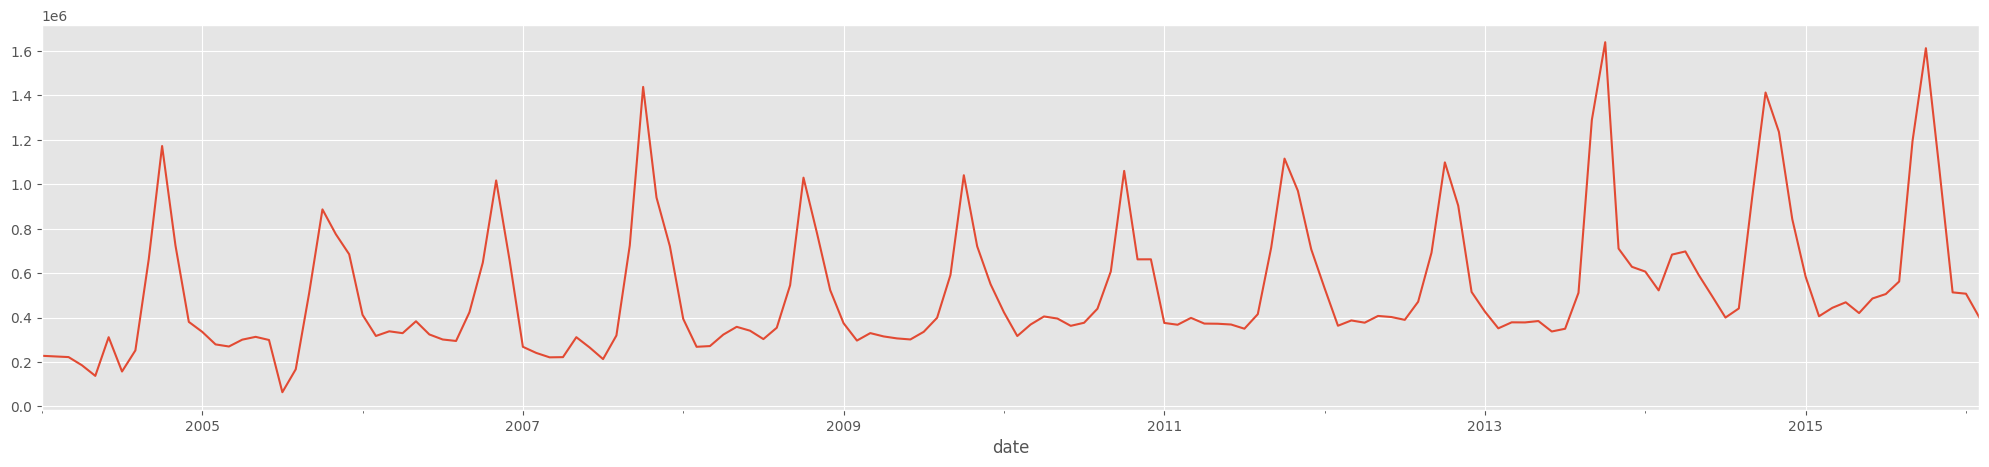

In [ ]:
ts.quantity.plot(figsize=(25,5));

## Обучение адаптивных моделей

Разбейте данные (quantity) на train и test.

* train - первые 85% данных

* test - следующие 15% данных

Проверьте, что в тест попало 22 измерения.

In [ ]:
# ваш код здесь

Обучите следующие модели на тренировочных данных и сделайте прогноз на 22 шага вперед (величина тестовых данных), нарисуйте прогнозы:

1) Простое экспоненциальное сглаживание с автоматически подбираемым $\alpha$

2) Модель Хольта (аддитивную) с автоматическим подбором гиперпараметров

3) Аддитивную модель Хольта с автоматическим подбором гиперпараметров и затухающим трендом

In [ ]:
# ваш код здесь

## Quiz

У какой из трех обученных моделей самый быстро возрастающий тренд?

Обучите четыре модели Хольта-Винтерса на тренировочных данных и сделайте прогноз на 22 шага вперед (величина тестовых данных), нарисуйте прогнозы:

1) Модель с аддитивными трендом и сезонностью

2) Модель с аддитивным трендом и мультипликативной сезонностью

3) Модель с аддитивными трендом и сезонностью и затухающим трендом

4) Модель с аддитивным трендом и мультипликативной сезонностью и затухающим трендом

In [ ]:
# ваш код здесь

Вычислите RMSE (корень из среднеквадратичной ошибки) на тестовых данных для каждого из четырех прогнозов.

In [ ]:
from sklearn.metrics import mean_squared_error

# ваш код здесь

## Quiz

Какая модель справилась лучше остальных?

## Quiz

Чему равно значение RMSE для лучшей модели? Ответ округлите до целого числа.

В предыдущем домашнем задании мы работали с логарифмированным рядом и вычисляли RMSE для него.

Вычислите ошибки последних четырех моделей для логарифмов правильных ответов и прогнозов.

In [ ]:
# ваш код здесь

## Опциональное задание (без проверки)

Воспользуйтесь экспоненциальными моделями из библиотеки Orbit для получения прогноза в данной задаче.

In [ ]:
# ваш код здесь